In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test = pd.read_csv("test.csv")


In [5]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [6]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

<ipython-input-6-56917a12cc5a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df.shape

(891, 12)

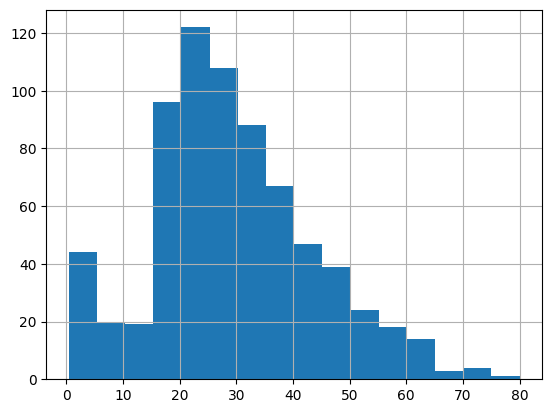

In [9]:
df['Age'].hist(bins=16)
plt.show()

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df['Age'] = df['Age'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)
df.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

<ipython-input-10-58244f907f10>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-10-58244f907f10>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

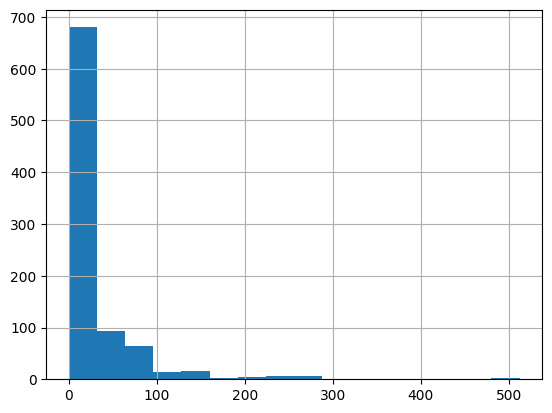

In [11]:
df['Fare'].hist(bins=16)
plt.show()

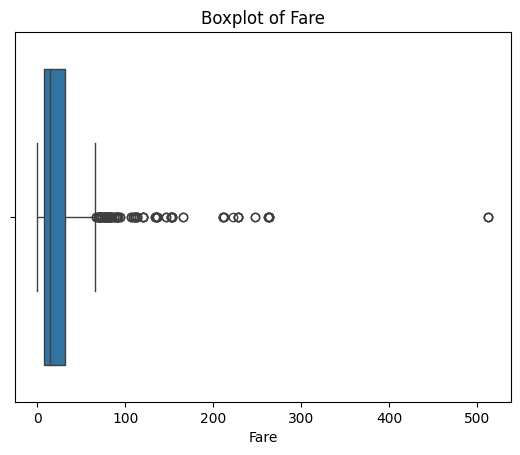

In [12]:
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()

In [13]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [14]:
df['Survived'].value_counts(normalize=True)


,proportion
Survived,
0,0.616162
1,0.383838


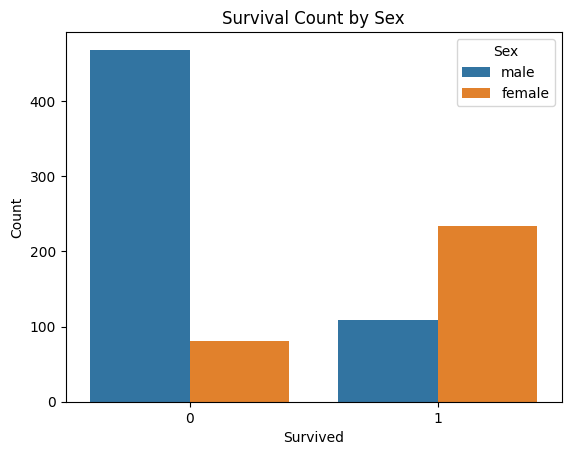

In [15]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [16]:
survival_count_by_gender = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100
survival_count_by_gender.columns = ['Not Survived (%)', 'Survived (%)']

print(survival_count_by_gender)

        Not Survived (%)  Survived (%)
Sex                                   
female         25.796178     74.203822
male           81.109185     18.890815


In [17]:
df.Pclass.value_counts()

,count
Pclass,
3,491
1,216
2,184


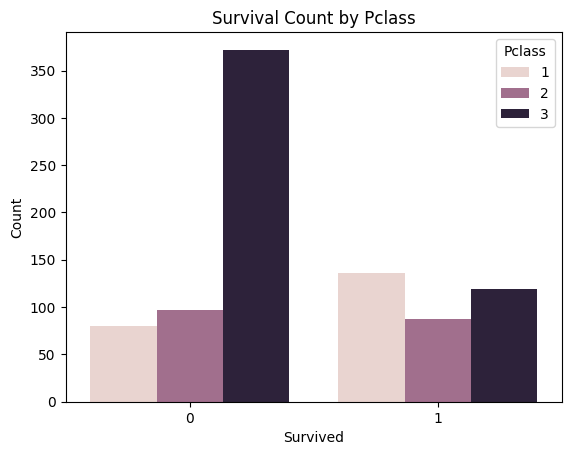

In [18]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Pclass')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

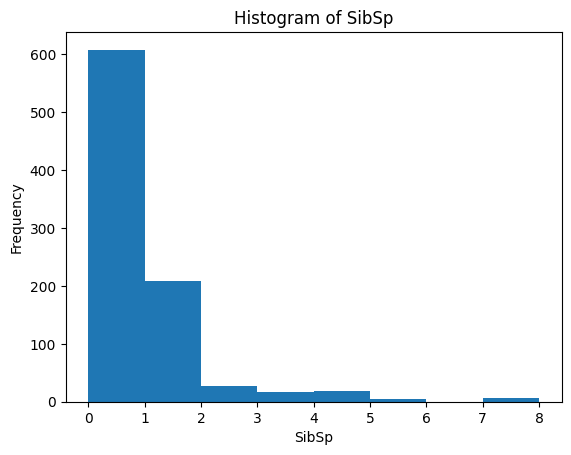

In [19]:
df.SibSp.plot(kind='hist', bins=8)
plt.title('Histogram of SibSp')
plt.xlabel('SibSp')
plt.show()

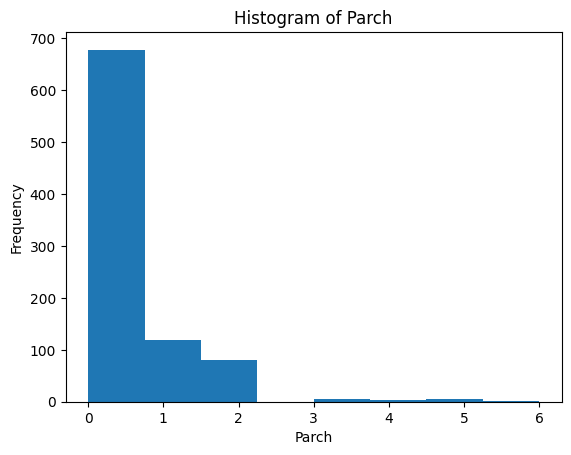

In [20]:
df.Parch.plot(kind='hist', bins=8)
plt.title('Histogram of Parch')
plt.xlabel('Parch')
plt.show()

In [21]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
Feauters = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[Feauters]
y= df['Survived']
X_test = (df_test[Feauters])
X_test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34,0,0,7.8292
1,3,1,47,1,0,7.0000
2,2,0,62,0,0,9.6875
3,3,0,27,0,0,8.6625
4,3,1,22,1,1,12.2875


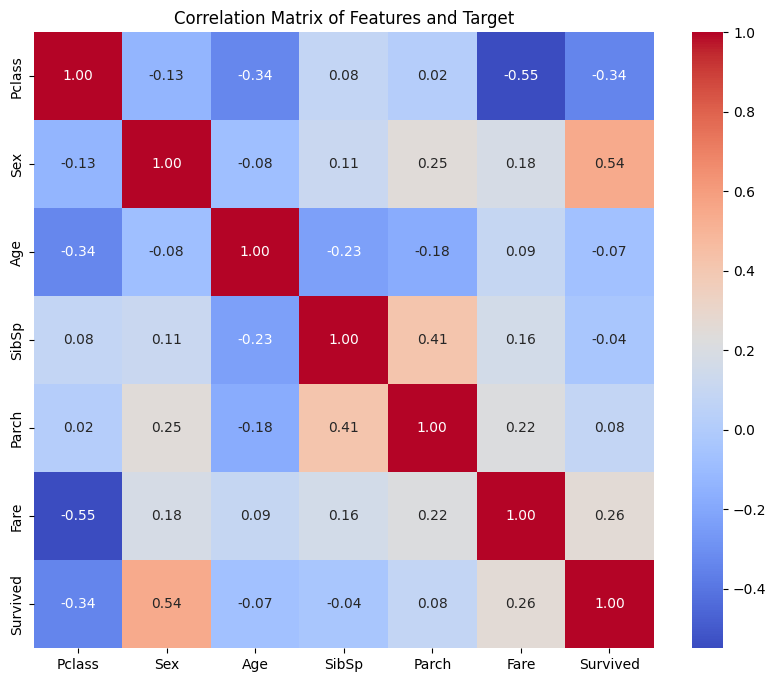

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
num_df = df.select_dtypes(include=[np.number])

correlation_matrix = df[Feauters + ['Survived']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features and Target')
plt.show()

In [23]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [24]:
predictions = model.predict(X_test)
print('Accuracy:', model.score(X_valid, y_valid))

Accuracy: 0.8324022346368715


In [25]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=200)

logistic_model.fit(X_train, y_train)

logistic_predictions = logistic_model.predict(X_test)

# Print the predictions
#print(logistic_predictions)
log_acc = logistic_model.score(X_valid, y_valid)
print('Accuracy:', log_acc)

Accuracy: 0.8100558659217877


In [26]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
y_Predo= dt_model.predict(X_test)
Dec_acc = dt_model.score(X_valid, y_valid)
Dec_acc

0.776536312849162

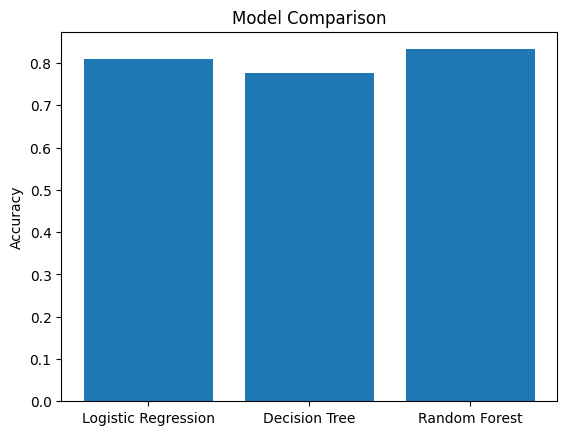

In [28]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [log_acc, Dec_acc, model.score(X_valid, y_valid)]
plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

In [29]:
from sklearn.metrics import classification_report

# Logistic Regression
logistic_report = classification_report(y_valid, logistic_model.predict(X_valid))
print("Logistic Regression Classification Report:\n", logistic_report)

# Decision Tree
dt_predictions = dt_model.predict(X_valid)
dt_report = classification_report(y_valid, dt_predictions)
print("Decision Tree Classification Report:\n", dt_report)

# Random Forest
rf_predictions = model.predict(X_valid)
rf_report = classification_report(y_valid, rf_predictions)
print("Random Forest Classification Report:\n", rf_report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.75      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       110
           1       0.75      0.62      0.68        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.70      0.76        69

    accuracy                           0.83       179
   macro

In [30]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_Predo})
output.to_csv('final_submission.csv', index=False)
print("Final submission was successfully saved!")

Final submission was successfully saved!
